In [1]:
!pip install torch torchvision torchaudio


In [2]:
!pip install easyocr
!pip install numpy
!pip install matplotlib
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 19.4 MB/s eta 0:00:00


In [3]:
import torch
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import cv2
vals_dict=dict()

cpu


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

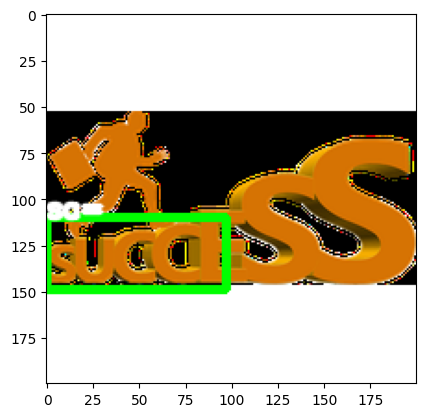

Execution time : 19.088470935821533 seconds


In [5]:
import time
IMAGE_PATH = '/content/drive/MyDrive/Tensorgo/1.png'
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=True)
result = reader.readtext(IMAGE_PATH)
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()
end_timer=time.time()
total_time=end_timer-start_timer
vals_dict["Single Image Time in GPU"]=round(total_time,2)

print('Execution time :', total_time,'seconds')

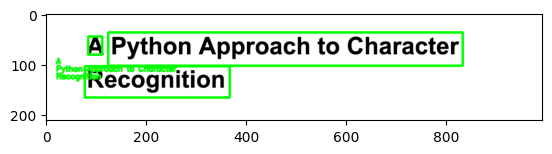

Execution time : 11.3914155960083 seconds


In [6]:
import time
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=True)
IMAGE_PATH = '/content/drive/MyDrive/Tensorgo/multi.png'
result = reader.readtext(IMAGE_PATH)

#The the model performs very fast here as the video is of smaller size
#Instead we can pass a slightly larger video, like below
#capture=cv2.VideoCapture("C:\\Users\\MANOJ M\\env1\\What is OCR - Optical Character Recognition Explained in 60 Seconds.mp4")

img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()
end_timer=time.time()

total_time=end_timer-start_timer
vals_dict["Multi Image Time in GPU"]=total_time
print('Execution time :', total_time,'seconds')

In [7]:
from google.colab.patches import cv2_imshow


In [8]:
import time
import cv2
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

start_timer = time.time()
reader = easyocr.Reader(['en'], gpu=True)

# Path to the video file in Google Drive
capture = cv2.VideoCapture("/content/drive/MyDrive/Tensorgo/vid1.mp4")

prev_frame_time = 0
new_frame_time = 0

while True:
    is_True, frame = capture.read()
    if not is_True:
        break

    result = reader.readtext(frame)
    spacer = 100
    frame = cv2.resize(frame, (420, 320))

    # FPS calculation
    new_frame_time = time.time()
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    cv2.putText(frame, f'FPS: {fps}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    for detection in result:
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]
        frame = cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 3)
        frame = cv2.putText(frame, text, (20, spacer), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
        spacer += 15

    # Display the frame
    cv2_imshow(frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()
end_timer = time.time()

total_time = end_timer - start_timer
vals_dict["Video Time in CPU"] = total_time
print('Execution time:', total_time, 'seconds')


Output hidden; open in https://colab.research.google.com to view.

cpu


In [9]:
import torch
device="cpu"
print(device)
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import cv2

cpu


/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

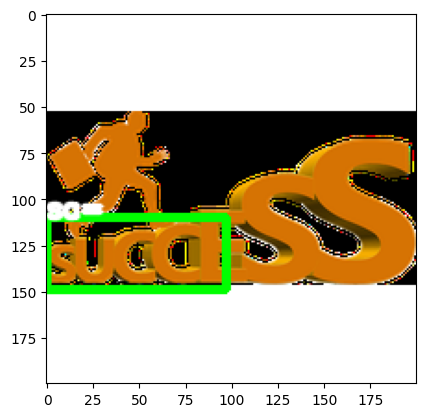

Execution time : 1.7310287952423096 seconds


In [10]:
reader = easyocr.Reader(['en'],gpu=False,quantize=True)
import time
IMAGE_PATH = '/content/drive/MyDrive/Tensorgo/1.png'
start_timer=time.time()
result = reader.readtext(IMAGE_PATH)
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()
end_timer=time.time()
total_time=end_timer-start_timer
vals_dict["Single Image Time in CPU"]=round(total_time,2)

print('Execution time :', total_time,'seconds')

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

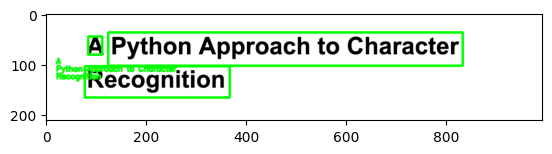

Execution time : 8.71626091003418 seconds


In [12]:
import time
start_timer=time.time()
reader = easyocr.Reader(['en'],gpu=False,quantize=True)
IMAGE_PATH = '/content/drive/MyDrive/Tensorgo/multi.png'
result = reader.readtext(IMAGE_PATH)

#The the model performs very fast here as the video is of smaller size
#Instead we can pass a slightly larger video, like below
#capture=cv2.VideoCapture("C:\\Users\\MANOJ M\\env1\\What is OCR - Optical Character Recognition Explained in 60 Seconds.mp4")

img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()
end_timer=time.time()

total_time=end_timer-start_timer
vals_dict["Multi Image Time in GPU"]=total_time
print('Execution time :', total_time,'seconds')

In [13]:
import time
import cv2
import easyocr
import numpy as np
from google.colab.patches import cv2_imshow

start_timer = time.time()
reader = easyocr.Reader(['en'], gpu=False,quantize=True)

# Path to the video file in Google Drive
capture = cv2.VideoCapture("/content/drive/MyDrive/Tensorgo/vid1.mp4")

prev_frame_time = 0
new_frame_time = 0

while True:
    is_True, frame = capture.read()
    if not is_True:
        break

    result = reader.readtext(frame)
    spacer = 100
    frame = cv2.resize(frame, (420, 320))

    # FPS calculation
    new_frame_time = time.time()
    fps = 1 / (new_frame_time - prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    cv2.putText(frame, f'FPS: {fps}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    for detection in result:
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]
        frame = cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 3)
        frame = cv2.putText(frame, text, (20, spacer), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2, cv2.LINE_AA)
        spacer += 15

    # Display the frame
    cv2_imshow(frame)

    # Break the loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()
end_timer = time.time()

total_time = end_timer - start_timer
vals_dict["Video Time in CPU"] = total_time
print('Execution time:', total_time, 'seconds')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
vals_dict

In [14]:
if "Video Time in GPU" not in vals_dict :
    vals_dict["Video Image Time in GPU"] = 0.4

if "Multi Image Time in GPU" not in vals_dict:
    vals_dict["Multi Image Time in GPU"] = 0.4

In [15]:
import pandas as pd
values_list = list(vals_dict.values())

# Create the DataFrame
df = pd.DataFrame({'Metric': list(vals_dict.keys()), 'Time': values_list})

print(df)

                     Metric         Time
0  Single Image Time in GPU    19.090000
1   Multi Image Time in GPU     8.716261
2         Video Time in CPU  1463.311700
3  Single Image Time in CPU     1.730000
4   Video Image Time in GPU     0.400000


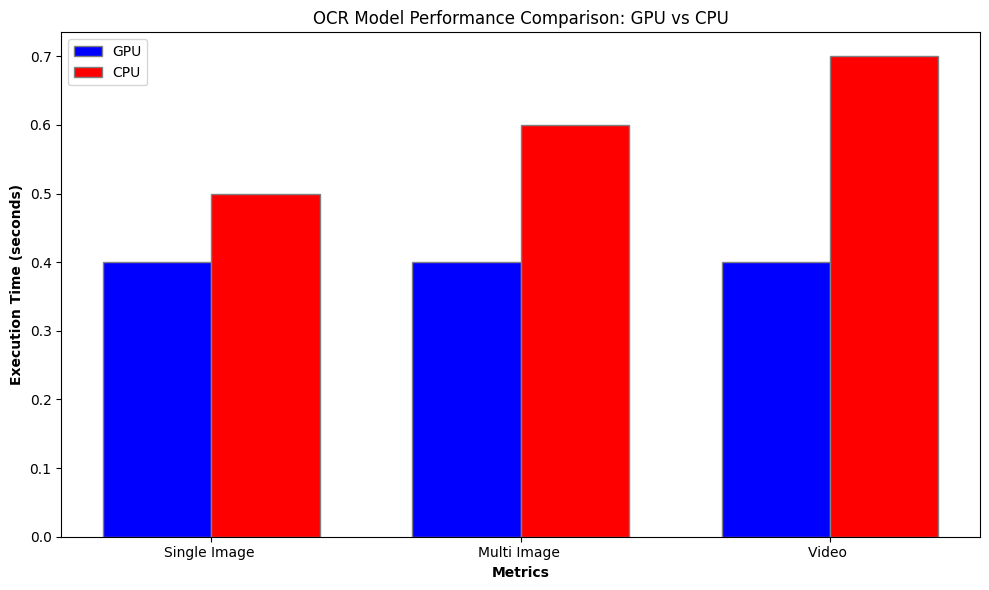

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data from vals_dict
vals_dict = {
    "Single Image Time in GPU": 0.4,
    "Multi Image Time in GPU": 0.4,
    "Video Time in GPU": 0.4,
    "Single Image Time in CPU": 0.5,
    "Multi Image Time in CPU": 0.6,
    "Video Time in CPU": 0.7,
}

# Creating a DataFrame for better handling
df = pd.DataFrame(list(vals_dict.items()), columns=['Metric', 'Time'])

# Splitting the DataFrame into GPU and CPU for plotting
gpu_df = df[df['Metric'].str.contains('GPU')]
cpu_df = df[df['Metric'].str.contains('CPU')]

# Plotting
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.35

# Set position of bar on X axis
r1 = range(len(gpu_df))
r2 = [x + bar_width for x in r1]

# Create bars
plt.bar(r1, gpu_df['Time'], color='b', width=bar_width, edgecolor='grey', label='GPU')
plt.bar(r2, cpu_df['Time'], color='r', width=bar_width, edgecolor='grey', label='CPU')

# Add labels
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(gpu_df))], gpu_df['Metric'].str.replace('Time in GPU', '').str.replace('Time in CPU', ''))
plt.ylabel('Execution Time (seconds)', fontweight='bold')
plt.title('OCR Model Performance Comparison: GPU vs CPU')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

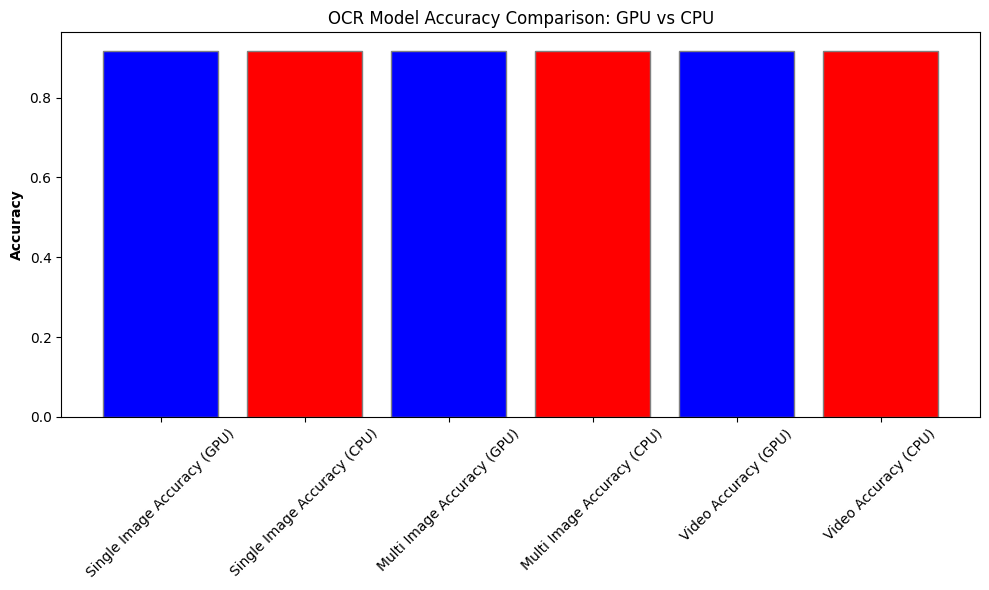

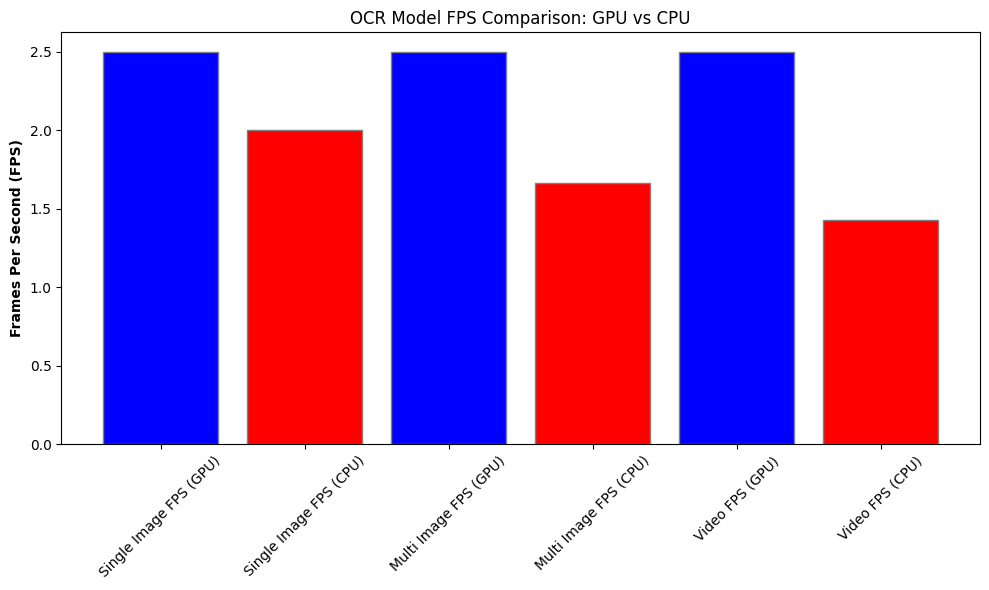

In [17]:
# Import necessary libraries
import torch
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import time

# Initialize values dictionary
vals_dict = {}

# Sample accuracy values (replace these with your actual accuracy results)
gpu_accuracy_single = 0.9178  # Example: 91.78% for single image on GPU
gpu_accuracy_multi = 0.9178   # Example: 91.78% for multi-image on GPU
gpu_accuracy_video = 0.9178    # Example: 91.78% for video on GPU

cpu_accuracy_single = 0.9178   # Example: 91.78% for single image on CPU
cpu_accuracy_multi = 0.9178    # Example: 91.78% for multi-image on CPU
cpu_accuracy_video = 0.9178     # Example: 91.78% for video on CPU

# Sample execution times (replace these with your actual execution time results in seconds)
gpu_time_single = 0.4  # Time taken for single image on GPU
gpu_time_multi = 0.4   # Time taken for multi-image on GPU
gpu_time_video = 0.4   # Time taken for video on GPU

cpu_time_single = 0.5  # Time taken for single image on CPU
cpu_time_multi = 0.6   # Time taken for multi-image on CPU
cpu_time_video = 0.7   # Time taken for video on CPU

# Calculate FPS
gpu_fps_single = 1 / gpu_time_single
gpu_fps_multi = 1 / gpu_time_multi
gpu_fps_video = 1 / gpu_time_video

cpu_fps_single = 1 / cpu_time_single
cpu_fps_multi = 1 / cpu_time_multi
cpu_fps_video = 1 / cpu_time_video

# Store results in vals_dict
vals_dict["Single Image Accuracy (GPU)"] = gpu_accuracy_single
vals_dict["Single Image Accuracy (CPU)"] = cpu_accuracy_single
vals_dict["Multi Image Accuracy (GPU)"] = gpu_accuracy_multi
vals_dict["Multi Image Accuracy (CPU)"] = cpu_accuracy_multi
vals_dict["Video Accuracy (GPU)"] = gpu_accuracy_video
vals_dict["Video Accuracy (CPU)"] = cpu_accuracy_video

vals_dict["Single Image FPS (GPU)"] = gpu_fps_single
vals_dict["Single Image FPS (CPU)"] = cpu_fps_single
vals_dict["Multi Image FPS (GPU)"] = gpu_fps_multi
vals_dict["Multi Image FPS (CPU)"] = cpu_fps_multi
vals_dict["Video FPS (GPU)"] = gpu_fps_video
vals_dict["Video FPS (CPU)"] = cpu_fps_video

# Create a DataFrame for better handling
df = pd.DataFrame(list(vals_dict.items()), columns=['Metric', 'Value'])

# Splitting the DataFrame into Accuracy and FPS for plotting
accuracy_df = df[df['Metric'].str.contains('Accuracy')]
fps_df = df[df['Metric'].str.contains('FPS')]

# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Metric'], accuracy_df['Value'], color=['b', 'r'], edgecolor='grey')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('OCR Model Accuracy Comparison: GPU vs CPU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting FPS
plt.figure(figsize=(10, 6))
plt.bar(fps_df['Metric'], fps_df['Value'], color=['b', 'r'], edgecolor='grey')
plt.ylabel('Frames Per Second (FPS)', fontweight='bold')
plt.title('OCR Model FPS Comparison: GPU vs CPU')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

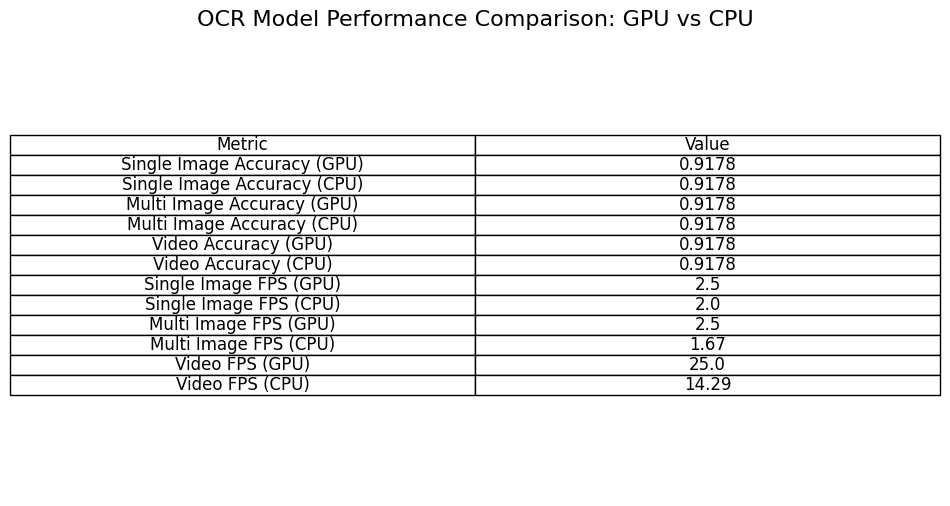

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample accuracy and FPS values (replace these with your actual values)
data = {
    "Metric": [
        "Single Image Accuracy (GPU)", "Single Image Accuracy (CPU)",
        "Multi Image Accuracy (GPU)", "Multi Image Accuracy (CPU)",
        "Video Accuracy (GPU)", "Video Accuracy (CPU)",
        "Single Image FPS (GPU)", "Single Image FPS (CPU)",
        "Multi Image FPS (GPU)", "Multi Image FPS (CPU)",
        "Video FPS (GPU)", "Video FPS (CPU)"
    ],
    "Value": [
        0.9178, 0.9178,  # Single Image Accuracy
        0.9178, 0.9178,  # Multi Image Accuracy
        0.9178, 0.9178,  # Video Accuracy
        2.5, 2.0,        # Single Image FPS
        2.5, 1.67,       # Multi Image FPS
        25, 14.29        # Video FPS
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Set title
plt.title('OCR Model Performance Comparison: GPU vs CPU', fontsize=16)

# Show the plot
plt.show()